In [3]:
# Data manipulation
import pandas as pd
import numpy as np
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import matplotlib.pyplot as plt
import seaborn as sns

import pydash as _
import datetime
import time
import os
import sys
import warnings
warnings.filterwarnings('ignore')
from google.cloud import bigquery
import json


In [9]:
def find_latency(row):
    return row['publish_acked_ts']-row["publish_start_ts"]

,request_id,publish_start_ts,publish_acked_ts,message_size_in_bytes,latency
0,991fff47-7856-4ac7-9f05-04b75e34914f,1613039602049,1613039602054,1024,5
1,6ae20546-e91c-4490-b3bf-f1873ea1beb2,1613039578957,1613039578962,1024,5
2,45b2f710-f140-4d26-9e7b-e0720b257beb,1613039599037,1613039599044,1024,7
3,162619bf-47d9-4d06-b11c-3019cfe14ba4,1613039773992,1613039773997,1024,5
4,634e1486-ebf1-4a8d-8cfc-72244f3d6757,1613039793678,1613039793682,1024,4



2 threads
	average RPS:  311.3466666666667
	average latency:  6.410881760952422

4 threads
	average RPS:  641.36
	average latency:  6.221576025944867

8 threads
	average RPS:  1221.6766666666667
	average latency:  6.537441712618996

16 threads
	average RPS:  1940.3066666666666
	average latency:  8.231956460490782

32 threads
	average RPS:  3521.153333333333
	average latency:  9.065329920310202

64 threads
	average RPS:  4080.7233333333334
	average latency:  15.683880390486328

128 threads
	average RPS:  4500.216666666666
	average latency:  28.43557310203583


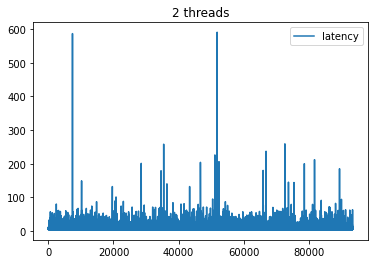

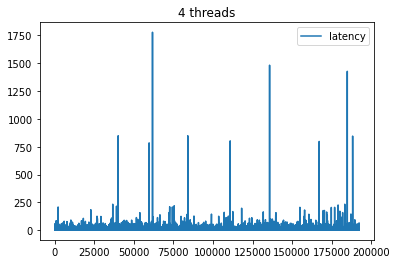

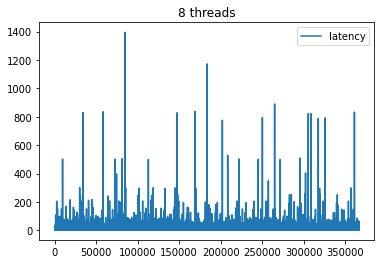

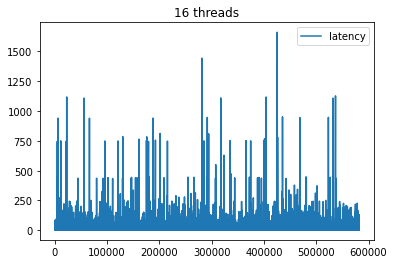

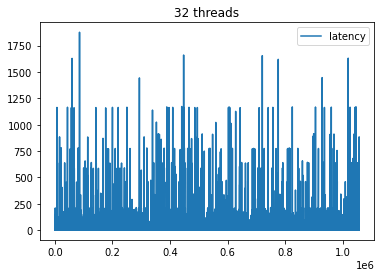

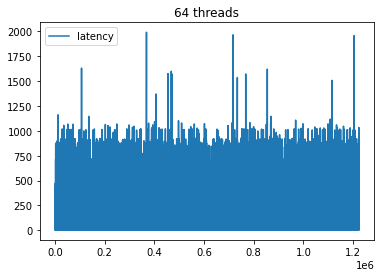

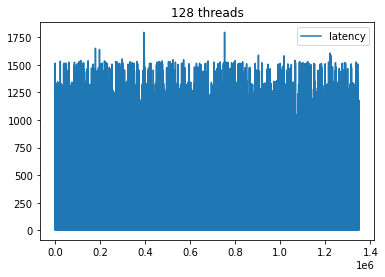

In [27]:
result = [0 for i in range(7)]
for i in range(7):
    result[i] = pd.read_csv("pubsubtest/result"+str(i+1)+".csv")
    result[i]["latency"] = result[i].apply (lambda row: find_latency(row), axis=1)
    print("\n"+str(pow(2,i+1))+" threads")
    print("\taverage RPS: ",len(result[i])/300)
    print("\taverage latency: ",result[i]["latency"].mean())
    result[i].plot(y="latency",title=str(pow(2,i+1))+" threads")

,request_id,publish_start_ts,publish_acked_ts,message_size_in_bytes,latency
0,991fff47-7856-4ac7-9f05-04b75e34914f,1613039602049,1613039602054,1024,5
1,6ae20546-e91c-4490-b3bf-f1873ea1beb2,1613039578957,1613039578962,1024,5
2,45b2f710-f140-4d26-9e7b-e0720b257beb,1613039599037,1613039599044,1024,7
3,162619bf-47d9-4d06-b11c-3019cfe14ba4,1613039773992,1613039773997,1024,5
4,634e1486-ebf1-4a8d-8cfc-72244f3d6757,1613039793678,1613039793682,1024,4


In [29]:
x=[]
y=[]
for i in range(7):
    x.append(len(result[i])/300)
    y.append(result[i]["latency"].mean())

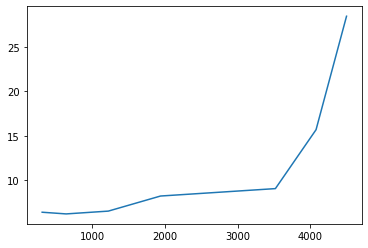

In [30]:
plt.plot(x,y)